In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
dataset=pd.read_csv('/content/melbourne_housing_sample.csv')
dataset.head()

,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,68 Studley,2,h,NaN,S,Jellis,3/9/2016,2.5,3067,2,1,1,126.0,NaN,NaN,Yarra City,-37.8014,144.996,Northern,4019
1,85 Turner,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067,2,1,1,202.0,NaN,NaN,Yarra City,-37.7996,144.998,Northern,4019
2,25 Bloomburg,2,h,1035000.0,S,Biggin,4/2/2016,2.5,3067,2,1,0,156.0,79.0,1900.0,Yarra City,-37.8079,144.993,Northern,4019
3,18/659 Victoria,3,u,NaN,VB,Rounds,4/2/2016,2.5,3067,3,2,1,NaN,NaN,NaN,Yarra City,-37.8114,145.012,Northern,4019
4,5 Charles St,3,h,1465000.0,SP,Biggin,4/3/2017,2.5,3067,3,2,0,134.0,150.0,1900.0,Yarra City,-37.8093,144.994,Northern,4019


In [6]:
dataset.shape

(12, 20)

In [8]:
#discarding columns
cols_to_use = [ 'Rooms', 'Type', 'Method', 'SellerG', 'Regionname', 'Propertycount',
               'Distance', 'CouncilArea', 'Bedroom2', 'Bathroom', 'Car', 'Landsize',
               'BuildingArea', 'Price']

dataset = dataset[cols_to_use]
dataset.head()


,Rooms,Type,Method,SellerG,Regionname,Propertycount,Distance,CouncilArea,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price
0,2,h,S,Jellis,Northern,4019,2.5,Yarra City,2,1,1,126.0,NaN,NaN
1,2,h,S,Biggin,Northern,4019,2.5,Yarra City,2,1,1,202.0,NaN,1480000.0
2,2,h,S,Biggin,Northern,4019,2.5,Yarra City,2,1,0,156.0,79.0,1035000.0
3,3,u,VB,Rounds,Northern,4019,2.5,Yarra City,3,2,1,NaN,NaN,NaN
4,3,h,SP,Biggin,Northern,4019,2.5,Yarra City,3,2,0,134.0,150.0,1465000.0


In [9]:
dataset.shape

(12, 14)

In [12]:
dataset.isna().sum()#null values identification

,0
Rooms,0
Type,0
Method,0
SellerG,0
Regionname,0
Propertycount,0
Distance,0
CouncilArea,0
Bedroom2,0
Bathroom,0


In [13]:
#filling of null values: here we can fill by calculating mean value
dataset['Landsize'].fillna(dataset['Landsize'].mean(), inplace=True)
dataset['BuildingArea'].fillna(dataset['BuildingArea'].mean(), inplace=True)
dataset['Price'].fillna(dataset['Price'].mean(), inplace=True)

dataset.isna().sum() # Verify null values are filled

,0
Rooms,0
Type,0
Method,0
SellerG,0
Regionname,0
Propertycount,0
Distance,0
CouncilArea,0
Bedroom2,0
Bathroom,0


In [14]:
dataset=pd.get_dummies(dataset,drop_first=True)
dataset.head()

,Rooms,Propertycount,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price,Type_u,Method_S,Method_SN,Method_SP,Method_VB,SellerG_Collins,SellerG_Jellis,SellerG_Nelson,SellerG_Rounds
0,2,4019,2.5,2,1,1,126.000000,160.2,1321000.0,False,True,False,False,False,False,True,False,False
1,2,4019,2.5,2,1,1,202.000000,160.2,1480000.0,False,True,False,False,False,False,False,False,False
2,2,4019,2.5,2,1,0,156.000000,79.0,1035000.0,False,True,False,False,False,False,False,False,False
3,3,4019,2.5,3,2,1,187.363636,160.2,1321000.0,True,False,False,False,True,False,False,False,True
4,3,4019,2.5,3,2,0,134.000000,150.0,1465000.0,False,False,False,True,False,False,False,False,False


In [17]:
X=dataset.drop('Price',axis=1)
y=dataset['Price']

In [18]:
# Step 2: Train-test split
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=2)

In [19]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(train_X, train_y)

In [20]:
reg.score(test_X, test_y)

-7.822365755765897

In [21]:
reg.score(train_X, train_y)

1.0

here for train dataset
 we get good score nut for test dataset we can't get good score

L1 regularisation

In [35]:
from sklearn.linear_model import Lasso
lasso_reg=Lasso(alpha=50,max_iter=100,tol=0.1)
lasso_reg.fit(train_X,train_y)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [36]:
lasso_reg.score(test_X,test_y)

-7.427494167445655

In [37]:
lasso_reg.score(train_X,train_y)#here getting wrong or not correct accuracy so do L2 regreesion

0.9516817437679679

In [38]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1.0)  # You can adjust the alpha value
ridge_reg.fit(train_X, train_y)

Ridge()

In [39]:
ridge_reg.score(train_X,train_y)

0.8442505648784533

In [40]:
ridge_reg.score(test_X,test_y)#getting wrong due to dataset

-2.525956990051066

  KNN
  

In [41]:
from sklearn.datasets import load_iris

iris = load_iris()

In [42]:
print("Feature names:", iris.feature_names)
print("Target names:", iris.target_names)

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']


In [44]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [45]:
df.shape

(150, 4)

In [46]:
df['target']=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [47]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [48]:
df[df.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [50]:
df0=df[:50]
df1=df[50:100]
df2=df[100:]

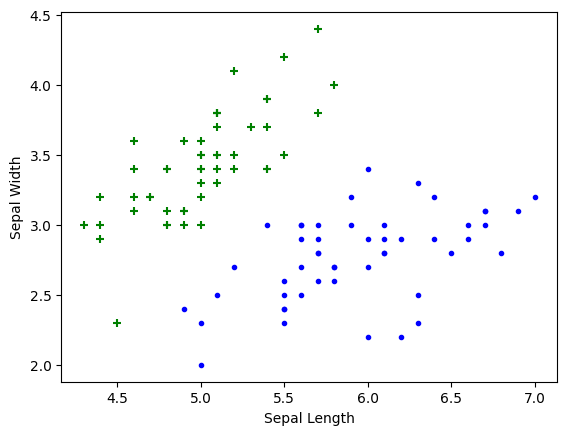

In [52]:
import matplotlib.pyplot as plt

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'],color="green",marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'],color="blue",marker='.')
#plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'],color="red",marker='*')
plt.show()

In [53]:
from sklearn.model_selection import train_test_split

In [58]:
X=df.drop(['target'],axis='columns')
y=df.target

In [59]:
# Step 2: Train-test split
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=2)

In [61]:
len(train_X)

120

In [62]:
len(train_y)

120

In [ ]:
#creating KNN classifier


In [65]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_X,train_y)

KNeighborsClassifier()

In [66]:
knn.score(test_X,test_y)

1.0

In [68]:
# [43] Confusion Matrix
from sklearn.metrics import confusion_matrix

y_pred = knn.predict(test_X)
cm = confusion_matrix(test_y, y_pred)
cm


array([[14,  0,  0],
       [ 0,  8,  0],
       [ 0,  0,  8]])

Text(58.222222222222214, 0.5, 'Truth')

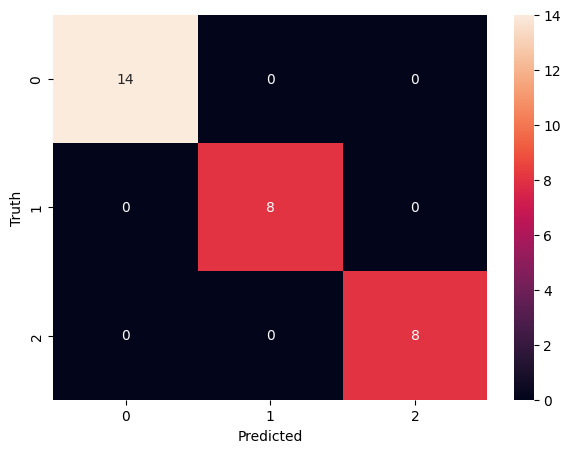

In [69]:
# [44] Plotting the Confusion Matrix
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn

plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [71]:
from sklearn.metrics import classification_report
print(classification_report(test_y,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

